In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
import torch
import torchvision
from torchvision import transforms
from time import perf_counter
from tensorflow.keras.models import load_model

In [ ]:
model = load_model(r"D:/Research/Model/model_rgb_32")
model.summary()

In [3]:
IMG_SCALE = 1./255
IMG_MEAN = np.array([0.485,0.456,0.406,0]).reshape(1,1,4)
IMG_STD = np.array([0.229,0.224,0.225,1]).reshape(1,1,4)
STRIDE = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
def img_alignment(img,output_stride,odd=False):
    img_size = np.asarray(img.shape[:2],dtype='float32')
    new_img_size = np.ceil(img_size / output_stride) * output_stride
    h,w = int(new_img_size[0]),int(new_img_size[1])
    
    x1 = img[:,:,0:3]
    x2 = img[:,:,3]
    new_x1 = cv2.resize(x1,(w,h),interpolation=cv2.INTER_CUBIC)
    new_x2 = cv2.resize(x2,(w,h),interpolation=cv2.INTER_NEAREST)
    new_x2 = np.expand_dims(new_x2,axis=2)
    new_img = np.concatenate((new_x1,new_x2),axis=2)
    return new_img

In [5]:
def get_trimap(mask, k_size=(5, 5), ite=1):
    kernel = np.ones(k_size, np.uint8)
    eroded = cv2.erode(mask, kernel, iterations=ite)
    dilated = cv2.dilate(mask, kernel, iterations=ite)
    trimap = np.full(mask.shape, 128)
    trimap[eroded == 255] = 255
    trimap[dilated == 0] = 0
    return trimap

(440, 320, 3)
(440, 320)


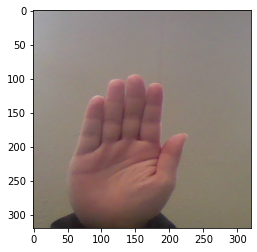

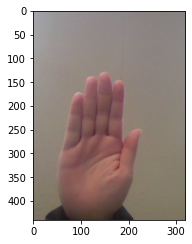

In [30]:
pic = r"D:/Research/Frame/testImage/g1_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h,w,_ = img.shape
img = cv2.resize(img,(320,320))
plt.imshow(img)

deeplabv3 = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
deeplabv3 = deeplabv3.to(device)
deeplabv3.eval()
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224,
                                                          0.225]),
])
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0).to(device)
with torch.no_grad():
    output = deeplabv3(input_batch)['out'][0]
output = output.argmax(0)
mask = output.byte().cpu().numpy()
mask = cv2.resize(mask, (w, h))
img = cv2.resize(img, (w, h))
trimap = get_trimap(mask, k_size=(10, 10), ite=5)
##ここまででtrimap画像を作成することに成功
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
plt.imshow(img)
ax2 = fig.add_subplot(2,2,2)
plt.imshow(trimap)
# trimap = np.expand_dims(trimap, axis=2)
# img = np.concatenate((img,trimap),axis=2)
# img = img.astype('float32')
# img = (IMG_SCALE * img - IMG_MEAN) / IMG_STD
# img = img.astype('float32')
# img = img_alignment(img,STRIDE)
# inputs = torch.from_numpy(np.expand_dims(img.transpose(2,0,1),axis=0))
# inputs.to(device)

# output = output.squeeze().cpu().numpy()
# alpha = cv2.resize(output,dsize=(w,h),interpolation=INTER_CUBIC)
# alpha = cv2.clip(alpha,0,1)*255.
# trimap = trimap.squeeze()
# mask = np.equal(trimap,128).astype('float32')
# alpha = (1- mask)* trimap + mask * alpha

# plt.imshow(alpha)

# bg = np.full_like(img,255)
# img = img.astype(float)
# bg = bg.astype(float)
# trimap = trimap.astype(float)/255

print(img.shape)
print(trimap.shape)
# print(bg.shape)
# img = cv2.multiply(img,trimap)
# bg = cv2.multiply(bg,1.0 - trimap)
# outImage = cv2.add(img,bg)
# plt.imshow(outImage/255)

# img = img.reshape(1,32,32,3)
# test = model.predict(img)
# np.set_printoptions(formatter={'float':'{:.4f}'.format})
# print(test)
# index = np.argmax(test)
# print('Gesture:',index+1)


In [ ]:
pic = r"D:/Research/Frame/testImage/g2_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [ ]:
pic = r"D:/Research/Frame/testImage/g3_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [ ]:
pic = r"D:/Research/Frame/testImage/g4_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [ ]:
pic = r"D:/Research/Frame/testImage/g5_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [ ]:
# H,S,V = number_of_elements(img)
# h = collections.Counter(H)
# s = collections.Counter(S)
# v = collections.Counter(V)
# new_h = sorted(H)

In [ ]:
# plt.hist(new_h,bins=180)

In [ ]:
# plt.hist(S,bins=255)

In [ ]:
# plt.hist(V,bins=255)

In [ ]:
# lower = np.array([0,0,0],dtype='uint8')
# upper = np.array([90,10,255],dtype='uint8')
# skinRegionHSV = cv2.inRange(img, lower, upper)
# bin = cv2.blur(skinRegionHSV,(2,2))
# _,thresh = cv2.threshold(bin,0,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)

In [ ]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [ ]:
# plt.imshow(thresh)

In [ ]:
# #輪郭抽出
# contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 50,contours))
# cv2.drawContours(thresh,contours,-1,color=(0,0,255),thickness=2)
# plt.imshow(thresh)

In [ ]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [ ]:
# thresh = thresh.reshape(1,64,64,1)

In [ ]:
# test = model.predict(thresh)
# print(test)